In [1]:
%matplotlib inline

import numpy as np
import h5py
import matplotlib
# matplotlib.use('Qt4Agg')
# matplotlib.use('TkAgg')
# %matplotlib notebook
import matplotlib.pyplot as plt
import sys
import scipy
from scipy import optimize
#from scipy.interpolate import interp1d

#sys.path.insert(0, '../source/SwissFEL_BERNINA_20181820/src/')
#import analysis
#from analysis import *

In [2]:
# data from lab experiments (Mar-Dec 2020)
# Mar 2020
time1 = np.array([1.068999028, 1.554907677, 1.943634597, 2.429543246, 2.915451895, 3.401360544,
                  3.644314869, 3.887269193, 4.130223518, 4.373177843, 4.616132167, 4.859086492])  # ms
# counts
ntot1 = np.array([357, 183, 105, 158, 113, 471, 319, 406, 327, 454, 206, 220])
nmarbles1 = np.array([0, 0, 0, 0, 1, 9, 4, 4, 3, 36, 70, 39])
nblobs1 = np.array([0, 0, 0, 0, 1, 16, 23, 19, 17, 34, 50, 140])
nfract1 = np.array([0, 0, 0, 0, 0, 0, 0, 3, 1, 5, 6, 16])
ndist1 = np.array([0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 2, 7])
# fractions
fice1 = (nmarbles1 + nblobs1 + nfract1 + ndist1)/ntot1.astype(np.float)
fmarbles1 = nmarbles1/ntot1.astype(np.float)
fblobs1 = nblobs1/ntot1.astype(np.float)
ffract1 = nfract1/ntot1.astype(np.float)
fdist1 = ndist1/ntot1.astype(np.float)
# nucleation rate
V1 = 5.24E-18  # m^3*s/ms
J1 = -np.gradient(np.log(1-fice1), time1)/V1  # /m^3/s

# Nov 3 2020
time2 = np.array([1.140684411, 1.520912548, 1.901140684, 2.281368821,
                  2.661596958, 3.041825095, 3.422053232, 3.802281369])  # ms
# counts
ntot2 = np.array([48, 39, 34, 210, 715, 881, 797, 292])
nmarbles2 = np.array([0, 1, 0, 5, 12, 13, 31, 21])
nblobs2 = np.array([0, 0, 0, 6, 12, 14, 62, 22])
nfract2 = np.array([0, 0, 0, 0, 0, 2, 0, 0])
ndist2 = np.array([0, 0, 0, 2, 3, 6, 13, 6])
# fractions
fice2 = (nmarbles2 + nblobs2 + nfract2 + ndist2)/ntot2.astype(np.float)
fmarbles2 = nmarbles2/ntot2.astype(np.float)
fblobs2 = nblobs2/ntot2.astype(np.float)
ffract2 = nfract2/ntot2.astype(np.float)
fdist2 = ndist2/ntot2.astype(np.float)
# nucleation rate
V2 = 4.551E-18  # m^3*s/ms
J2 = -np.gradient(np.log(1-fice2), time2)/V2  # /m^3/s

# Dec 2020
time3 = np.array([3.373060174, 3.794692695, 4.005508956, 4.216325217])
# counts
ntot3 = np.array([633, 566, 298, 325])
nmarbles3 = np.array([12, 149, 74, 15])
nblobs3 = np.array([15, 50, 192, 176])
nfractdist3 = np.array([2, 6, 28, 134])
# nwater3 = np.array([604, 361, 4, 0]) # ntot3 - nblobs3 - nmarbles3 - nfractdist3
# fractions
fice3 = (nmarbles3 + nblobs3 + nfractdist3)/ntot3.astype(np.float)
fmarbles3 = nmarbles3/ntot3.astype(np.float)
fblobs3 = nblobs3/ntot3.astype(np.float)
ffractdist3 = nfractdist3/ntot3.astype(np.float)
# numerical correction to 100% ice
fice3[np.where(fice3 >= 1)] = 0.999
#fice3[np.where(fice3 >= 1)] = 0.999999
# nucleation rate
V3 = 3.13E-18  # m^3*s/ms
J3 = -np.gradient(np.log(1-fice3), time3)/V3  # /m^3/s

# Nov 3 2020

# total
time = np.hstack([time1, time2, time3])
setindex = np.array([len(time1), len(time1)+len(time2),
                     len(time1)+len(time2)+len(time3)])
fice = np.hstack([fice1, fice2, fice3])
fmarbles = np.hstack([fmarbles1, fmarbles2, fmarbles3])
fblobs = np.hstack([fblobs1, fblobs2, fblobs3])
ffractdist = np.hstack([ffract1+fdist1, ffract2+fdist2, ffractdist3])
J = np.hstack([J1, J2, J3])
G = np.hstack([J1*V1, J2*V2, J3*V3])
V = np.hstack([V1, V2, V3])

In [9]:
print(G)
print(time)

[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.83754883e-02
  6.07455040e-02  1.37268220e-01  2.55715393e-02 -4.63812477e-02
  2.35420890e-01  1.84178648e+00  4.76921697e+00  6.30607603e+00
  6.83155292e-02 -1.79669857e-10  4.98757347e-02  5.06192217e-02
 -3.07256794e-02  1.37050813e-01  1.88247632e-01  1.07770835e-01
  9.55381465e-01  1.25284073e+01  1.53167482e+01  1.23185761e+01]
[1.06899903 1.55490768 1.9436346  2.42954325 2.91545189 3.40136054
 3.64431487 3.88726919 4.13022352 4.37317784 4.61613217 4.85908649
 1.14068441 1.52091255 1.90114068 2.28136882 2.66159696 3.0418251
 3.42205323 3.80228137 3.37306017 3.7946927  4.00550896 4.21632522]


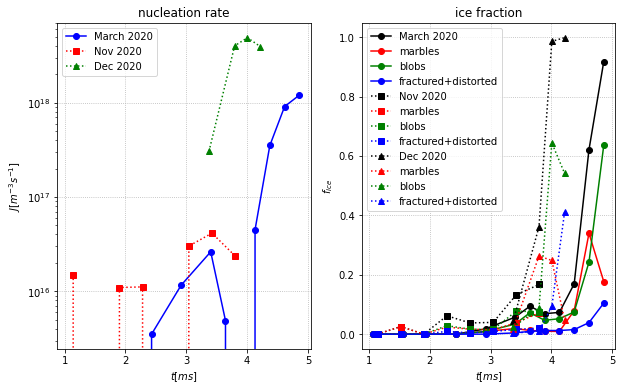

In [3]:
# plot r1 and g1
f, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10, 6))

#axes[0].plot(time, J, 'bo:', label='March 2020')
#axes[0].semilogy(time[0], J[0], 'bo-', label='March 2020')
#axes[0].semilogy(time[1], J[1], 'rs:', label='Nov 2020')
axes[0].semilogy(time[:setindex[0]], J[:setindex[0]],
                 'bo-', label='March 2020')
axes[0].semilogy(time[setindex[0]:setindex[1]],
                 J[setindex[0]:setindex[1]], 'rs:', label='Nov 2020')
axes[0].semilogy(time[setindex[1]:setindex[2]],
                 J[setindex[1]:setindex[2]], 'g^:', label='Dec 2020')
axes[0].legend(loc='upper left', prop={'size': 10})
axes[0].set_xlabel('$t [ms]$')
axes[0].set_ylabel('$J [m^{-3}s^{-1}]$')
axes[0].set_title('nucleation rate')
# axes[0].set_xlim(170,310)
# axes[0].set_ylim(0.274,0.279)
axes[0].grid(linestyle='dotted')

axes[1].set_title('ice fraction')
axes[1].plot(time1, fice1, 'ko-', label='March 2020')
axes[1].plot(time1, fmarbles1, 'ro-', label='marbles')
axes[1].plot(time1, fblobs1, 'go-', label='blobs')
#axes[1].plot(time1, ffract1, 'b^-', label='fractured')
#axes[1].plot(time1, fdist1, 'b+-', label='distorted')
axes[1].plot(time1, (ffract1+fdist1), 'bo-', label='fractured+distorted')

axes[1].plot(time2, fice2, 'ks:', label='Nov 2020')
axes[1].plot(time2, fmarbles2, 'rs:', label='marbles')
axes[1].plot(time2, fblobs2, 'gs:', label='blobs')
#axes[1].plot(time2, ffract2, 'b^:', label='fractured')
#axes[1].plot(time2, fdist2, 'b+:', label='distorted')
axes[1].plot(time2, (ffract2+fdist2), 'bs:', label='fractured+distorted')

axes[1].plot(time3, fice3, 'k^:', label='Dec 2020')
axes[1].plot(time3, fmarbles3, 'r^:', label='marbles')
axes[1].plot(time3, fblobs3, 'g^:', label='blobs')
axes[1].plot(time3, ffractdist3, 'b^:', label='fractured+distorted')
axes[1].legend(loc='upper left', prop={'size': 10})
axes[1].set_xlabel('$t [ms]$')
axes[1].set_ylabel('$f_{ice}$')
#axes[1].set_ylabel('number of droplets')
# axes[1].set_xlim(170,310)
# axes[1].set_ylim(0.274,0.279)
axes[1].grid(linestyle='dotted')

#plt.savefig('reaction_rates-fig1.eps', format='eps')
plt.show()

In [4]:
# Gaussian peak fitting functions
#fitfunc = lambda p, x: p[0]*np.exp(-(x-p[1])**2/(2*p[2]**2))
#errfunc = lambda p, x, y: fitfunc(p, x) - y

def reactions(k, marbles, blobs, fractured):
    dmdt = -(k[0] + k[2])*np.array(marbles)
    dbdt = k[0]*np.array(marbles) - k[1]*np.array(blobs)
    dcdt = k[2]*np.array(marbles) + k[1]*np.array(blobs)
    return np.array([dmdt, dbdt, dcdt])


def errfunc(k, t, marbles, blobs, fractured): return (reactions(k, marbles, blobs, fractured) -
                                                      np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()


# reaction rates
k0 = [0.6, 0.5, 0.4]  # initial guess
[k1, success] = optimize.leastsq(errfunc, k0[:], args=(
    time1, nmarbles1, nblobs1, nfract1+ndist1))

if success:
    print('March 2020 - all data - raw counts')
    print(k1)

[k1, success] = optimize.leastsq(errfunc, k0[:], args=(
    time1[-3:], nmarbles1[-3:], nblobs1[-3:], nfract1[-3:]+ndist1[-3:]))

if success:
    print('March 2020 - last 3 data points (>10% ice) - raw counts')
    print(k1)

[k1, success] = optimize.leastsq(errfunc, k0[:], args=(
    time1[-3:], fmarbles1[-3:], fblobs1[-3:], ffract1[-3:]+fdist1[-3:]))

if success:
    print('March 2020 - last 3 data points (>10% ice) - normalized')
    print(k1)

March 2020 - all data - raw counts
[ 1.35943555 -0.86758667  0.19666447]
March 2020 - last 3 data points (>10% ice) - raw counts
[ 1.28738068 -0.94977762  0.26596442]
March 2020 - last 3 data points (>10% ice) - normalized
[ 1.81048877 -0.80247539 -0.10734853]


In [5]:
# Gaussian peak fitting functions
# fitfunc = lambda p, x: p[0]*np.exp(-(x-p[1])**2/(2*p[2]**2))
# errfunc = lambda p, x, y: fitfunc(p, x) - y

def reactions(k, marbles, blobs, fractured, J, water):
    # time derivatives form rate equations
    dmdt = J*np.array(water) - (k[0] + k[2])*np.array(marbles)  # marbles
    dbdt = k[0]*np.array(marbles) - k[1]*np.array(blobs)  # blobs
    dcdt = k[2]*np.array(marbles) + k[1]*np.array(blobs)  # fractured
    return np.array([dmdt, dbdt, dcdt])


def derivatives(t, marbles, blobs, fractured, setindex):
    return np.array([np.hstack([np.gradient(marbles[setindex[j-1]:setindex[j]], t[setindex[j-1]:setindex[j]]) if (j > 0) else np.gradient(marbles[:setindex[j]], t[:setindex[j]]) for j in range(len(setindex))]), np.hstack([np.gradient(blobs[setindex[j-1]:setindex[j]], t[setindex[j-1]:setindex[j]]) if (j > 0) else np.gradient(blobs[:setindex[j]], t[:setindex[j]]) for j in range(len(setindex))]), np.hstack([np.gradient(fractured[setindex[j-1]:setindex[j]], t[setindex[j-1]:setindex[j]]) if (j > 0) else np.gradient(fractured[:setindex[j]], t[:setindex[j]]) for j in range(len(setindex))])])

# errfunc = lambda k, t, marbles, blobs, fractured, J, water: (reactions(k, marbles, blobs, fractured, J, water) - np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()


def errfunc(k, t, marbles, blobs, fractured, J, water, setindex=None):
    # if len(t.shape) > 1:
    # if isinstance(t[0], np.ndarray):
        # return (np.hstack([reactions(k, marbles[j], blobs[j], fractured[j], J[j], water[j]) for j in range(len(t))]) - np.hstack([[np.gradient(marbles[j], t[j]), np.gradient(blobs[j], t[j]), np.gradient(fractured[j], t[j])] for j in range(len(t))])))
    if setindex is not None:
        # print('hstack deluxe')
        return (reactions(k, marbles, blobs, fractured, J, water) - derivatives(t, marbles, blobs, fractured, setindex=setindex)).flatten()
    else:
        # print('gradient style')
        return (reactions(k, marbles, blobs, fractured, J, water) - np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()


# reaction rates
# k0 = [0.6/V, 0.5/V, 0.4/V] # initial guess
k0 = [3./V.mean(), 0.5/V.mean(), 3./V.mean()]  # initial guess

[k1, success] = optimize.leastsq(errfunc, k0[:], args=(
    time1, fmarbles1, fblobs1, ffract1+fdist1, J1, (1-fice1)))
if success:
    print('March 2020 - all data')
    print(k1*V1, 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(
        errfunc(k1, time1, fmarbles1, fblobs1, ffract1+fdist1, J1, (1-fice1))**2)*V1*V1)
    print('')

[k1, success]=optimize.leastsq(errfunc, k0[:], args=(
    time1[-3:], fmarbles1[-3:], fblobs1[-3:], ffract1[-3:]+fdist1[-3:], J1[-3:], (1-fice1)[-3:]))
if success:
    print('March 2020 - last 3 data points (>10% ice)')
    print(k1*V1, 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(
        errfunc(k1, time1, fmarbles1, fblobs1, ffract1+fdist1, J1, (1-fice1))**2)*V1*V1)
    print('')

[k2, success]=optimize.leastsq(errfunc, k0[:], args=(
    time2, fmarbles2, fblobs2, ffract2+fdist2, J2, (1-fice2)))
if success:
    print('Nov 2020 - all data')
    print(k2*V2, 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(
        errfunc(k2, time2, fmarbles2, fblobs2, ffract2+fdist2, J2, (1-fice2))**2)*V2*V2)
    print('')

[k3, success]=optimize.leastsq(errfunc, k0[:], args=(
    time3, fmarbles3, fblobs3, ffractdist3, J3, (1-fice3)))
if success:
    print('Dec 2020 - all data')
    print(k3*V3, 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(
        errfunc(k3, time3, fmarbles3, fblobs3, ffractdist3, J3, (1-fice3))**2)*V3*V3)
    print('')

[k, success]=optimize.leastsq(errfunc, k3[:], args=(
    time, fmarbles, fblobs, ffractdist, J, (1-fice), setindex))
if success:
    print('March+Nov+Dec 2020 - all data')
    print(k*V.mean(), 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(errfunc(k, time, fmarbles,
          fblobs, ffractdist, J, (1-fice), setindex)**2)*V.mean()*V.mean())
    print('')

March 2020 - all data
[ 1.79963805e+00 -1.46188911e-08  1.79963809e+00] fraction rate per droplet per ms
residuals per data point: 0.08180788917430161

March 2020 - last 3 data points (>10% ice)
[ 1.79823326e+00 -1.52324466e-08  1.79823330e+00] fraction rate per droplet per ms
residuals per data point: 0.08180793981519231

Nov 2020 - all data
[6.09463860e-01 6.22215269e-09 6.09463865e-01] fraction rate per droplet per ms
residuals per data point: 0.001814358001723361

Dec 2020 - all data
[5.42624839e+00 7.52891953e-10 5.42624839e+00] fraction rate per droplet per ms
residuals per data point: 3.429044677512672

March+Nov+Dec 2020 - all data
[4.15466939e+00 9.00613361e-10 4.15466939e+00] fraction rate per droplet per ms
residuals per data point: 1.3331221804828532



In [6]:
# Gaussian peak fitting functions
#fitfunc = lambda p, x: p[0]*np.exp(-(x-p[1])**2/(2*p[2]**2))
#errfunc = lambda p, x, y: fitfunc(p, x) - y

def reactions(k, marbles, blobs, fractured, J, water):
    # time derivatives form rate equations
    dmdt = J*np.array(water) - (k[0] + k[2])*np.array(marbles)  # marbles
    dbdt = k[0]*np.array(marbles) - k[1]*np.array(blobs)  # blobs
    dcdt = k[2]*np.array(marbles) + k[1]*np.array(blobs)  # fractured
    return np.array([dmdt, dbdt, dcdt])


def derivatives(t, marbles, blobs, fractured, setindex):
    return np.array([np.hstack([np.gradient(marbles[setindex[j-1]:setindex[j]], t[setindex[j-1]:setindex[j]]) if (j > 0) else np.gradient(marbles[:setindex[j]], t[:setindex[j]]) for j in range(len(setindex))]), np.hstack([np.gradient(blobs[setindex[j-1]:setindex[j]], t[setindex[j-1]:setindex[j]]) if (j > 0) else np.gradient(blobs[:setindex[j]], t[:setindex[j]]) for j in range(len(setindex))]), np.hstack([np.gradient(fractured[setindex[j-1]:setindex[j]], t[setindex[j-1]:setindex[j]]) if (j > 0) else np.gradient(fractured[:setindex[j]], t[:setindex[j]]) for j in range(len(setindex))])])

#errfunc = lambda k, t, marbles, blobs, fractured, J, water: (reactions(k, marbles, blobs, fractured, J, water) - np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()


def errfunc(k, t, marbles, blobs, fractured, J, water, setindex=None):
    # if len(t.shape) > 1:
    # if isinstance(t[0], np.ndarray):
    # return (np.hstack([reactions(k, marbles[j], blobs[j], fractured[j], J[j], water[j]) for j in range(len(t))]) - np.hstack([[np.gradient(marbles[j], t[j]), np.gradient(blobs[j], t[j]), np.gradient(fractured[j], t[j])] for j in range(len(t))])))
    if setindex is not None:
        #print('hstack deluxe')
        return (reactions(k, marbles, blobs, fractured, J, water) - derivatives(t, marbles, blobs, fractured, setindex=setindex)).flatten()
    else:
        #print('gradient style')
        return (reactions(k, marbles, blobs, fractured, J, water) - np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()


# reaction rates
# k0 = [0.6, 0.5, 0.4] # initial guess
k0 = [3., 0.5, 3.]  # initial guess

[k1, success] = optimize.leastsq(errfunc, k0[:], args=(
    time1, fmarbles1, fblobs1, ffract1+fdist1, J1*V1, (1-fice1)))
if success:
    print('March 2020 - all data')
    print(k1, 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(
        errfunc(k1, time1, fmarbles1, fblobs1, ffract1+fdist1, J1*V1, (1-fice1))**2))
    print('')

[k1, success] = optimize.leastsq(errfunc, k0[:], args=(
    time1[-3:], fmarbles1[-3:], fblobs1[-3:], ffract1[-3:]+fdist1[-3:], J1[-3:]*V1, (1-fice1)[-3:]))
if success:
    print('March 2020 - last 3 data points (>10% ice)')
    print(k1, 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(
        errfunc(k1, time1, fmarbles1, fblobs1, ffract1+fdist1, J1*V1, (1-fice1))**2))
    print('')

[k2, success] = optimize.leastsq(errfunc, k0[:], args=(
    time2, fmarbles2, fblobs2, ffract2+fdist2, J2*V2, (1-fice2)))
if success:
    print('Nov 2020 - all data')
    print(k2, 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(
        errfunc(k2, time2, fmarbles2, fblobs2, ffract2+fdist2, J2*V2, (1-fice2))**2))
    print('')

[k3, success] = optimize.leastsq(errfunc, k0[:], args=(
    time3, fmarbles3, fblobs3, ffractdist3, J3*V3, (1-fice3)))
if success:
    print('Dec 2020 - all data')
    print(k3, 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(
        errfunc(k3, time3, fmarbles3, fblobs3, ffractdist3, J3*V3, (1-fice3))**2))
    print('')

[k, success] = optimize.leastsq(errfunc, k3[:], args=(
    time, fmarbles, fblobs, ffractdist, G, (1-fice), setindex))
if success:
    print('March+Nov+Dec 2020 - all data')
    print(k, 'fraction rate per droplet per ms')
    print('residuals per data point:', np.mean(
        errfunc(k, time, fmarbles, fblobs, ffractdist, G, (1-fice), setindex)**2))
    print('')

March 2020 - all data
[ 3.58853897 -0.78797466  1.78540222] fraction rate per droplet per ms
residuals per data point: 0.024423264321755015

March 2020 - last 3 data points (>10% ice)
[ 3.60872212 -0.80247536  1.69088469] fraction rate per droplet per ms
residuals per data point: 0.02451129251637039

Nov 2020 - all data
[-0.16211463 -0.54661751  0.8222193 ] fraction rate per droplet per ms
residuals per data point: 0.0012713485680378204

Dec 2020 - all data
[11.21818934  1.79933847  2.99776466] fraction rate per droplet per ms
residuals per data point: 2.3027177332450575

March+Nov+Dec 2020 - all data
[7.488073   0.8920651  1.74072257] fraction rate per droplet per ms
residuals per data point: 0.5527713597309981

